In [6]:
import os

import string
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os
import re
import sys
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

## Overview
I will be working on a Binary classification problem of predicting whether a credit card client will default or not. 
For this problem, I am using [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, all the features have been defined as numerical values with features like "Sex" and "Marital Status" being categorical. It should be noted that with 24 features, this dataset has a relatively small number of features, making it a low-dimensional problem. Ultimately, the goal is to estimate whether a person will default (fail to pay) their credit card bills.

In [7]:
credit_df = pd.read_csv("data/UCI_Credit_Card.csv")
credit_df 

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


### Data Splitting

In [8]:
train_df, test_df = train_test_split(credit_df, train_size = 0.70, random_state = 123)
train_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
16395,16396,320000.0,2,1,2,36,0,0,0,0,...,19370.0,10155.0,3788.0,5000.0,5018.0,1000.0,3000.0,0.0,7013.0,0
21448,21449,440000.0,2,1,2,30,-1,-1,-1,0,...,171244.0,150897.0,117870.0,612.0,87426.0,130007.0,3018.0,15000.0,51663.0,0
20034,20035,160000.0,2,3,1,44,-2,-2,-2,-2,...,-18.0,-18.0,-18.0,0.0,0.0,0.0,0.0,0.0,0.0,0
25755,25756,120000.0,2,2,1,30,0,0,0,0,...,103058.0,71095.0,47379.0,3706.0,5502.0,4204.0,3017.0,2005.0,1702.0,0
1438,1439,50000.0,1,2,2,54,1,2,0,0,...,27585.0,27910.0,27380.0,0.0,1400.0,1200.0,1500.0,1000.0,1500.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28636,28637,380000.0,2,2,1,37,0,0,0,0,...,14291.0,15949.0,15556.0,1204.0,1300.0,1242.0,1900.0,0.0,3000.0,0
17730,17731,360000.0,2,1,1,54,1,-2,-2,-1,...,2580.0,2580.0,6941.0,0.0,0.0,2580.0,0.0,6941.0,0.0,0
28030,28031,50000.0,2,3,1,29,0,0,0,0,...,39420.0,8824.0,9009.0,2002.0,2000.0,1530.0,1000.0,327.0,329.0,1
15725,15726,30000.0,2,2,2,21,0,0,0,0,...,30841.0,29434.0,16565.0,2000.0,2000.0,2000.0,1765.0,331.0,0.0,0


### EDA
I will be conducting an initial exploration of the training set to better understand its characteristics.

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21000 entries, 16395 to 19966
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          21000 non-null  int64  
 1   LIMIT_BAL                   21000 non-null  float64
 2   SEX                         21000 non-null  int64  
 3   EDUCATION                   21000 non-null  int64  
 4   MARRIAGE                    21000 non-null  int64  
 5   AGE                         21000 non-null  int64  
 6   PAY_0                       21000 non-null  int64  
 7   PAY_2                       21000 non-null  int64  
 8   PAY_3                       21000 non-null  int64  
 9   PAY_4                       21000 non-null  int64  
 10  PAY_5                       21000 non-null  int64  
 11  PAY_6                       21000 non-null  int64  
 12  BILL_AMT1                   21000 non-null  float64
 13  BILL_AMT2                   2100

Seems like there are no missing values and all the columns are encoded as numeric columns. 

In [10]:
train_df.shape

(21000, 25)

In [11]:
train_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,...,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,14962.348238,167880.651429,1.600762,1.852143,1.554000,35.500810,-0.015429,-0.137095,-0.171619,-0.225238,...,43486.610905,40428.518333,38767.202667,5673.585143,5.895027e+03,5311.432286,4774.021381,4751.850095,5237.762190,0.223238
std,8650.734050,130202.682167,0.489753,0.792961,0.521675,9.212644,1.120465,1.194506,1.196123,1.168556,...,64843.303993,61187.200817,59587.689549,17033.241454,2.180143e+04,18377.997079,15434.136142,15228.193125,18116.846563,0.416427
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-50616.000000,-61372.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7498.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2293.750000,1739.500000,1215.750000,1000.000000,8.200000e+02,390.000000,266.000000,234.000000,110.750000,0.000000
50%,14960.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19102.500000,18083.000000,16854.500000,2100.000000,2.007000e+03,1809.500000,1500.000000,1500.000000,1500.000000,0.000000
75%,22458.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54763.250000,50491.000000,49253.750000,5007.250000,5.000000e+03,4628.500000,4021.250000,4016.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.227082e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


Notably, since the feature means and ranges vary significantly, with some values in the tens and others in the hundreds of thousands, our pipeline should include a StandardScaler() to prevent certain features from disproportionately influencing the model.

In [12]:
np.max(train_df, axis=0)

ID                              30000.0
LIMIT_BAL                     1000000.0
SEX                                 2.0
EDUCATION                           6.0
MARRIAGE                            3.0
AGE                                79.0
PAY_0                               8.0
PAY_2                               8.0
PAY_3                               8.0
PAY_4                               8.0
PAY_5                               8.0
PAY_6                               8.0
BILL_AMT1                      964511.0
BILL_AMT2                      983931.0
BILL_AMT3                      855086.0
BILL_AMT4                      891586.0
BILL_AMT5                      927171.0
BILL_AMT6                      961664.0
PAY_AMT1                       873552.0
PAY_AMT2                      1227082.0
PAY_AMT3                       896040.0
PAY_AMT4                       621000.0
PAY_AMT5                       426529.0
PAY_AMT6                       528666.0
default.payment.next.month          1.0


In [13]:
np.min(train_df, axis=0)

ID                                 1.0
LIMIT_BAL                      10000.0
SEX                                1.0
EDUCATION                          0.0
MARRIAGE                           0.0
AGE                               21.0
PAY_0                             -2.0
PAY_2                             -2.0
PAY_3                             -2.0
PAY_4                             -2.0
PAY_5                             -2.0
PAY_6                             -2.0
BILL_AMT1                     -15308.0
BILL_AMT2                     -67526.0
BILL_AMT3                    -157264.0
BILL_AMT4                     -50616.0
BILL_AMT5                     -61372.0
BILL_AMT6                    -339603.0
PAY_AMT1                           0.0
PAY_AMT2                           0.0
PAY_AMT3                           0.0
PAY_AMT4                           0.0
PAY_AMT5                           0.0
PAY_AMT6                           0.0
default.payment.next.month         0.0
dtype: float64

In [14]:
X_train, y_train = (
    train_df.drop(columns=["default.payment.next.month"]),
    train_df["default.payment.next.month"],
)

X_test, y_test = (
    test_df.drop(columns=["default.payment.next.month"]),
    test_df["default.payment.next.month"],
)

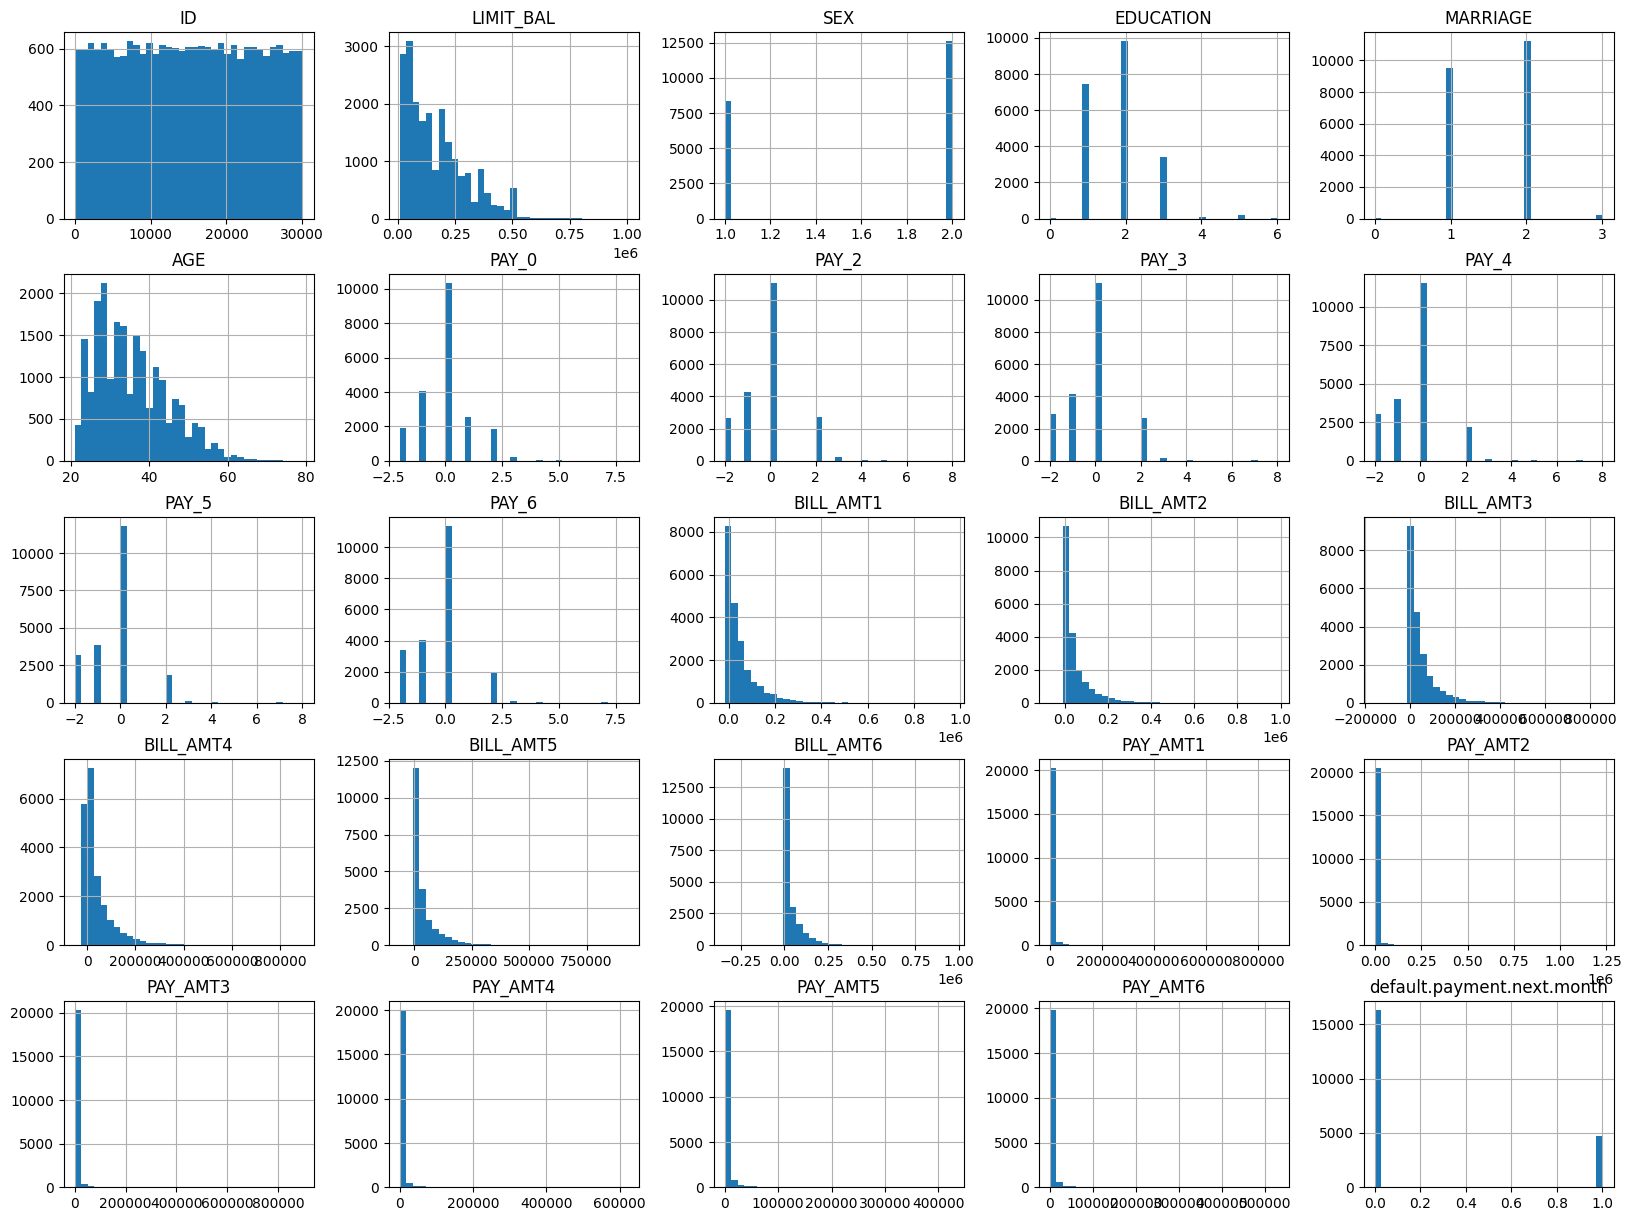

In [15]:
train_df.hist(bins=35, figsize=(20, 15));

The histograms reveal that most numerical variables are right-skewed, suggesting the presence of outliers or uneven distributions.

In [16]:
train_df.corr().style.background_gradient(cmap="plasma").format(precision=2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,1.00,0.03,0.02,0.04,-0.02,0.02,-0.03,-0.01,-0.02,-0.00,-0.02,-0.02,0.02,0.02,0.03,0.04,0.02,0.02,0.01,0.01,0.04,0.01,-0.00,0.00,-0.02
LIMIT_BAL,0.03,1.00,0.03,-0.22,-0.12,0.15,-0.27,-0.30,-0.29,-0.27,-0.25,-0.24,0.28,0.28,0.28,0.30,0.30,0.29,0.19,0.18,0.21,0.20,0.22,0.22,-0.15
SEX,0.02,0.03,1.00,0.01,-0.03,-0.09,-0.06,-0.07,-0.07,-0.06,-0.06,-0.04,-0.04,-0.03,-0.02,-0.02,-0.02,-0.02,0.00,0.00,-0.01,0.00,-0.00,-0.00,-0.05
EDUCATION,0.04,-0.22,0.01,1.00,-0.14,0.18,0.11,0.13,0.12,0.11,0.10,0.09,0.03,0.02,0.02,0.00,-0.01,-0.01,-0.04,-0.03,-0.04,-0.04,-0.03,-0.04,0.03
MARRIAGE,-0.02,-0.12,-0.03,-0.14,1.00,-0.41,0.02,0.02,0.04,0.03,0.04,0.03,-0.03,-0.02,-0.03,-0.03,-0.03,-0.03,-0.00,-0.01,-0.00,-0.01,-0.00,-0.01,-0.02
AGE,0.02,0.15,-0.09,0.18,-0.41,1.00,-0.03,-0.05,-0.05,-0.05,-0.05,-0.04,0.06,0.06,0.06,0.06,0.06,0.06,0.02,0.02,0.03,0.03,0.03,0.02,0.01
PAY_0,-0.03,-0.27,-0.06,0.11,0.02,-0.03,1.00,0.67,0.57,0.53,0.50,0.47,0.19,0.19,0.18,0.17,0.18,0.17,-0.08,-0.07,-0.07,-0.07,-0.05,-0.06,0.33
PAY_2,-0.01,-0.30,-0.07,0.13,0.02,-0.05,0.67,1.00,0.77,0.66,0.62,0.58,0.24,0.24,0.23,0.22,0.22,0.22,-0.08,-0.06,-0.06,-0.05,-0.03,-0.04,0.27
PAY_3,-0.02,-0.29,-0.07,0.12,0.04,-0.05,0.57,0.77,1.00,0.78,0.69,0.63,0.21,0.24,0.23,0.22,0.22,0.22,0.00,-0.07,-0.05,-0.05,-0.04,-0.04,0.24
PAY_4,-0.00,-0.27,-0.06,0.11,0.03,-0.05,0.53,0.66,0.78,1.00,0.82,0.71,0.20,0.22,0.25,0.24,0.24,0.23,-0.01,0.00,-0.07,-0.05,-0.03,-0.03,0.22


As shown in the correlation matrix and histograms, the ID column is non-informative and will be dropped. While some features, such as the billing and payment amounts, are highly correlated and even have strong multicollinearity, meaning no independent signals, because we are only working with 24 features (not a lot), they may still contain useful information, so we will still keep them. To prevent overfitting, I will retain all relevant predictors for now and later perform feature selection based on their importance and correlation with the target variable. Moreover, to clean up the dat we may perform OHE on Sex as it is a binary categorical feature. 

In [17]:
print(
    "Fraction that default:\n",
    train_df["default.payment.next.month"].value_counts(normalize=True),
)

Fraction that default:
 default.payment.next.month
0    0.776762
1    0.223238
Name: proportion, dtype: float64


In [18]:
custom_scorer = make_scorer(f1_score, average="macro")
scoring_metric = custom_scorer

From the values above, it is evident that the target classes are imbalanced, so I plan to use class_weight='balanced' to address this issue. Additionally, since both classes hold equal importance, the model’s performance should be assessed using the macro-averaged F1-score.

Overall, the dataset is clean and numerical with no missing values. The features vary widely in scale and correlation. The target variable is imbalanced, so appropriate scaling and balanced class weights will be applied during the modeling process. Evaluation will be based on the macro-averaged F1-score to ensure both classes are equally represented in the performance assessment.

### Feature Engineer

In [19]:
train_df['AVG_PAY']= train_df[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].mean(axis=1)
train_df['MAX_PAY'] = train_df[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].max(axis=1)
train_df['PAY_TREND'] = train_df['PAY_0'] - train_df['PAY_6']
train_df['AVG_BILL_AMT'] = train_df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].mean(axis=1)
train_df['DEBT_RATIO'] = train_df['BILL_AMT6'] / train_df['LIMIT_BAL']
train_df['UTILIZATION'] = train_df['BILL_AMT6'] / train_df['LIMIT_BAL']
train_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,AVG_PAY,MAX_PAY,PAY_TREND,AVG_BILL_AMT,DEBT_RATIO,UTILIZATION
16395,16396,320000.0,2,1,2,36,0,0,0,0,...,3000.0,0.0,7013.0,0,0.000000,0,0,19868.833333,0.011838,0.011838
21448,21449,440000.0,2,1,2,30,-1,-1,-1,0,...,3018.0,15000.0,51663.0,0,-0.500000,0,-1,88137.666667,0.267886,0.267886
20034,20035,160000.0,2,3,1,44,-2,-2,-2,-2,...,0.0,0.0,0.0,0,-2.000000,-2,0,-18.000000,-0.000112,-0.000112
25755,25756,120000.0,2,2,1,30,0,0,0,0,...,3017.0,2005.0,1702.0,0,0.000000,0,0,88447.000000,0.394825,0.394825
1438,1439,50000.0,1,2,2,54,1,2,0,0,...,1500.0,1000.0,1500.0,0,0.500000,2,1,34180.166667,0.547600,0.547600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28636,28637,380000.0,2,2,1,37,0,0,0,0,...,1900.0,0.0,3000.0,0,0.333333,2,-2,14478.166667,0.040937,0.040937
17730,17731,360000.0,2,1,1,54,1,-2,-2,-1,...,0.0,6941.0,0.0,0,-0.833333,1,2,2016.833333,0.019281,0.019281
28030,28031,50000.0,2,3,1,29,0,0,0,0,...,1000.0,327.0,329.0,1,0.000000,0,0,33267.500000,0.180180,0.180180
15725,15726,30000.0,2,2,2,21,0,0,0,0,...,1765.0,331.0,0.0,0,0.000000,0,0,27202.333333,0.552167,0.552167


- AVG_PAY: The average of "PAY_0" to "PAY_6", representing a client’s overall payment timeliness across six months. This captures long-term payment behavior, where consistently higher delays often signal chronic repayment issues and increased risk of default.
- MAX_PAY: The maximum delay recorded across all payment status features. This highlights severely overdue clients, even if their average behavior is better, revealing potential high-risk individuals.
- PAY_TREND: the trend is calculated as PAY_0 - PAY_6 to measure the payment range, displaying whether payment punctuality is improving or deteriorating over time. This will help identify behavioral changes where a worsening trend may indicate growing financial instability, while improvement suggests recovery.
- AVG_BILL_AMT: The mean of BILL_AMT1 to BILL_AMT6, indicating a client’s typical balance level. This directly mirrors spending and repayment habits, where clients with persistently high balances may be closer to financial strain.
- DEBT_RATIO: The ratio is calculated with the most recent bill amount (BILL_AMT6) to the credit limit (LIMIT_BAL). This feature measures credit utilization, where higher values suggest a client is using most of their available credit, often a strong predictor of default.
- UTILIZATION: Captures current credit usage intensity, calculated with the latest month’s balance relative to the credit limit. This will provides a snapshot of short-term financial behavior, where clients nearing their limit may be at immediate risk.

### Preprocessing and transformations

I will identify the different feature types and group the columns together while also making a column transformer to apply the appropriate transformations.

Because the newly engineered features "AVG_BILL_AMT" and "UTILIZATION" summarize the key information from the BILL_AMT variables while reducing redundancy, I decided that the original BILL_AMT1 to BILL_AMT6 columns should be dropped to simplify the model and minimize multicollinearity.

In [67]:
drop_features = ["ID", 
                 "BILL_AMT1", 
                 "BILL_AMT2", 
                 "BILL_AMT3", 
                 "BILL_AMT4",
                 "BILL_AMT5",
                 "BILL_AMT6",]
numeric_features = [
    "LIMIT_BAL",
    "PAY_0",
    "PAY_2",
    "PAY_3",
    "PAY_4",
    "PAY_5",
    "PAY_6",
    "PAY_AMT1",
    "PAY_AMT2",
    "PAY_AMT3",
    "PAY_AMT4",
    "PAY_AMT5",
    "PAY_AMT6",
    "AGE",
    "AVG_PAY",
    "MAX_PAY",
    "PAY_TREND",
    "AVG_BILL_AMT",
    "DEBT_RATIO",
    "UTILIZATION"
]
binary_features = ["SEX"]
categorical_features = ["EDUCATION", "MARRIAGE"]
target = "default.payment.next.month"

I noticed that PAY_0 to PAY_6 are ordinal status codes. However, in this case, I will juts treat them as numeric and standardize them to preserve order while aligning scales.

In [68]:
preprocessor = make_column_transformer(
    ("drop", drop_features),
    (StandardScaler(), numeric_features),
    (OneHotEncoder(drop="if_binary"), binary_features),
    (OneHotEncoder(handle_unknown="ignore"), categorical_features),
)

I used preprocessing pipeline to remove redundant features and ensures the dataset is clean and standardized for modeling. As mentioned above, the ID and BILL_AMT1 to BILL_AMT6 columns were dropped because their information is not relevant and effectively summarized by the engineered features AVG_BILL_AMT and UTILIZATION, respectively. This helps reduce dimensionality and minimizing multicollinearity. The remaining numeric features are standardized using StandardScaler() to ensure equal weighting, while categorical and binary features (SEX, EDUCATION, and MARRIAGE) are one-hot encoded to allow the model to interpret them properly. This combination provides a balanced, well-structured input for downstream classification models.

In [69]:
target = "default.payment.next.month"

X_train = train_df.drop([target], axis=1)
y_train = train_df[target]

X_test = test_df.drop([target], axis=1)
y_test = test_df[target]

In [70]:
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores.iloc[i], std_scores.iloc[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

results = {}

### Baseline Model

I will be using `scikit-learn`'s dummy classifiier as the baseline model

In [71]:
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC

In [72]:
dummy = DummyClassifier(strategy= "most_frequent")
results["dummy"] = mean_std_cross_val_scores(
    dummy, X_train, y_train, return_train_score=True, scoring=scoring_metric
)
pd.DataFrame(results)

,dummy
fit_time,0.004 (+/- 0.003)
score_time,0.003 (+/- 0.001)
test_score,0.437 (+/- 0.000)
train_score,0.437 (+/- 0.000)


In [73]:
cross_val_score(dummy, X_train, y_train)

array([0.77690476, 0.77690476, 0.77666667, 0.77666667, 0.77666667])

I have made my baseline with a DummyClassifier with strategy = "most_frequent", for comparison. This model always predicts the majority class (non-default) and was evaluated using 5-fold cross-validation with the macro-averaged F1-score.

The baseline achieved an average F1-macro score of 0.437 (± 0.000) across folds.

This low value is expected since the model does not learn from any features and only predicts the dominant class. It is only serving as a benchmark to evaluate whether more advanced models provide meaningful predictive improvements.

### Linear Model

The first model that I will use as a comparison is a linear model, Logistics Regression.

In [74]:
pipe_lr = make_pipeline(
    preprocessor, LogisticRegression(max_iter=1000, class_weight="balanced")
)
results["logistic_regression"] = mean_std_cross_val_scores(
    pipe_lr, X_train, y_train, return_train_score=True, scoring=scoring_metric
)
pd.DataFrame(results)

,dummy,logistic_regression
fit_time,0.004 (+/- 0.003),0.037 (+/- 0.013)
score_time,0.003 (+/- 0.001),0.004 (+/- 0.001)
test_score,0.437 (+/- 0.000),0.666 (+/- 0.007)
train_score,0.437 (+/- 0.000),0.667 (+/- 0.002)


#### Hyperparameter Optomization

I have decided to tune the model with RandomizedSearchCV rather than GridSearchCV because logistic regression’s main hyperparameter C can vary over several orders of magnitude, and random search can explore the continuous range using a log-uniform without having to list many points. With the dataset having 30000 rows, it is relatively large, so CV is gonna be expensive which is why randome search woudl be preferable. Ultimately, RandomizedSearchCV is the more practical and scalable choice for identifying an optimal regularization strength and improving F1-macro performance in this problem.

In [75]:
from scipy.stats import lognorm, loguniform, randint

param_grid = {"logisticregression__C": loguniform(1e-3, 1e3)}

random_search = RandomizedSearchCV(
    pipe_lr,
    param_grid,
    n_iter=50,
    verbose=1,
    n_jobs=1,
    scoring=scoring_metric,
    random_state=123,
    return_train_score=True,
)

random_search.fit(X_train, y_train);

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [77]:
print("Best hyperparameter values: ", random_search.best_params_)
print("Best score: %0.3f" % (random_search.best_score_))

pd.DataFrame(random_search.cv_results_)[
    [
        "mean_train_score",
        "mean_test_score",
        "param_logisticregression__C",
        "mean_fit_time",
        "rank_test_score",
        "std_test_score",
    ]
].set_index("rank_test_score").sort_index()[:10]

Best hyperparameter values:  {'logisticregression__C': np.float64(0.002280695888578119)}
Best score: 0.668


,mean_train_score,mean_test_score,param_logisticregression__C,mean_fit_time,std_test_score
rank_test_score,,,,,
1,0.667940,0.668286,0.002281,0.018173,0.005938
2,0.667582,0.667799,0.003570,0.020008,0.005560
3,0.667284,0.667233,0.004940,0.019394,0.005566
4,0.666842,0.666709,0.031822,0.047169,0.005621
5,0.666982,0.666561,0.114569,0.028918,0.005696
6,0.666826,0.666501,0.057847,0.028676,0.005875
7,0.666851,0.666494,0.052100,0.026415,0.005909
8,0.666887,0.666485,0.086647,0.038882,0.005618
9,0.666907,0.666479,0.022967,0.023388,0.005454


In [78]:
best_logreg = random_search.best_estimator_
results["logreg (tuned)"] = mean_std_cross_val_scores(
    best_logreg, X_train, y_train, return_train_score=True, scoring=scoring_metric
)

pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
dummy,0.004 (+/- 0.003),0.003 (+/- 0.001),0.437 (+/- 0.000),0.437 (+/- 0.000)
logistic_regression,0.037 (+/- 0.013),0.004 (+/- 0.001),0.666 (+/- 0.007),0.667 (+/- 0.002)
logreg (tuned),0.032 (+/- 0.012),0.004 (+/- 0.000),0.668 (+/- 0.007),0.668 (+/- 0.003)


As shown above, the baseline DummyClassifier achieved a macro F1-score of 0.437, which is pretty low and expected given that our dataset has imbalanced target values and the dummy just predicts the new example as the majority class. Then, I trained a Logistic Regression model, which shows a clear improvement in performance, reaching an average F1-macro of approx 0.666. This indicated that the model was learnign new patterns in the features. So the natural following step to evaluate this model was to tune the hyperparameter C for the optimal score. I did this through cross-validation, which showed that the score was achieved at C = 0.001 with a mean_test_score of approx 0.668, slightly higher than the untuned model. Notably, the improvement was very small,  indicating that the model is at its limit performance, which is still pretty low. Observing the training and validation scores, it is clear that the model is not overfitting, and may be underfitting. Thus, suggesting that a more complex model is needed to capture the data's complexity, and I think that a non-linear model may be the best for this classification problem.